# Mean and std

Total de imagens: 48562
Exibindo uma imagem:


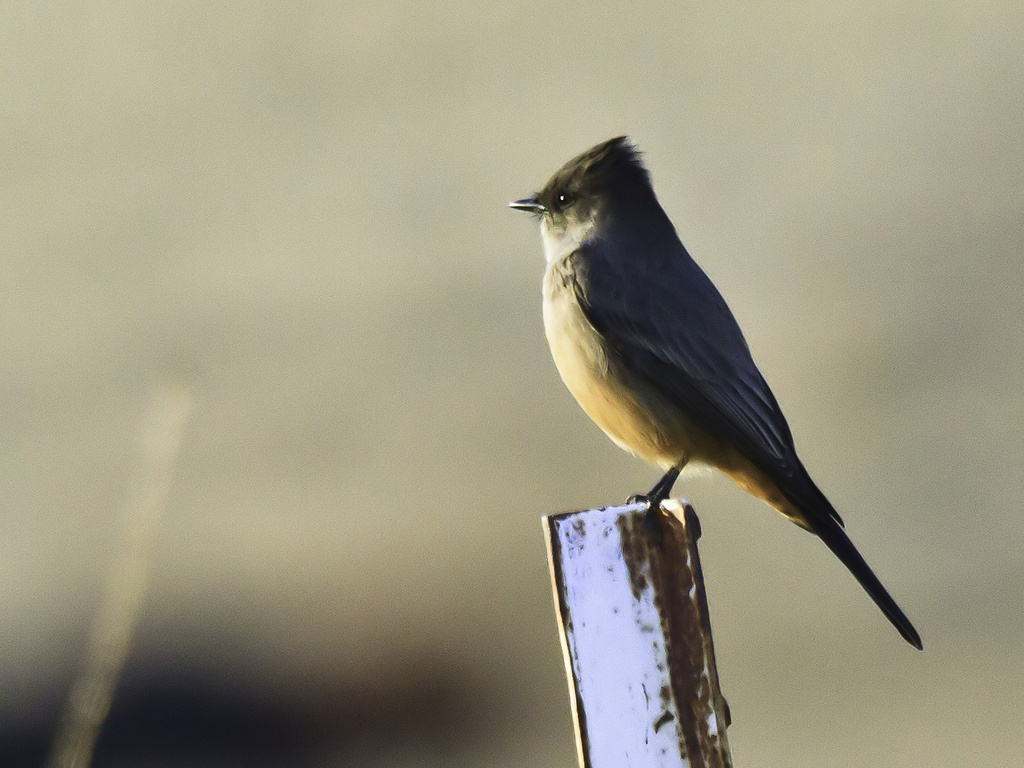

In [2]:
import numpy as np
from PIL import Image
import glob, os

root_dir = '/home/jroberto/INF492-TF/dataset/nabirds/versions/1/images'

paths = []

for current_path, subdirs, files in os.walk(root_dir):
    for filename in files:
        if filename.lower().endswith('.jpg'):
            full_path = os.path.join(current_path, filename)
            paths.append(full_path)

print(f"Total de imagens: {len(paths)}")

print("Exibindo uma imagem:")
img = Image.open(paths[0])
img.show()

In [ ]:
sum_rgb = np.zeros(3, dtype=np.float64)
sum_sq  = np.zeros(3, dtype=np.float64)
count   = 0

for p in paths:
    img = np.array(Image.open(p).convert('RGB'), np.float64)/255.0
    h, w, _ = img.shape
    pix = img.reshape(-1, 3)
    sum_rgb += pix.sum(axis=0)
    sum_sq  += (pix ** 2).sum(axis=0)
    count  += pix.shape[0]

mean = sum_rgb / count
var  = (sum_sq / count) - (mean ** 2)
std  = np.sqrt(var)

print("Média por canal:", mean.tolist())
print("Desvio por canal:", std.tolist())